In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### First we create some random data for 2D space

In [2]:
df = pd.DataFrame({
    'x':[12,55,58,60,72,25,28,29,20,28,18,29,33,24,45,45,52,51,52,55,53,55,61,64,69,72],
    'y':[39,15,25,24,28,42,40,38,36,30,52,54,46,55,59,63,70,66,63,58,23,14,8,19,7,24]
})

In [3]:
# make a copy to check with library implementation
df1 = df.copy(deep=True)

In [4]:
k = 3  # we create 3 clusters ?? How we know about that!! hmmm..... plot and check $$
# but there is no algorithm which find the exact value for 'K' you have to check on different value and calculate their
# variences and take with lowest variences 'k' value

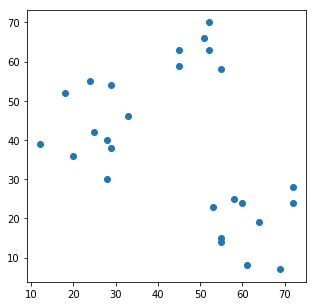

In [5]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df.x,df.y)
plt.show()

In [6]:
np.random.seed(10) # make this 10 to clear explanation because I explain according to this random data
centroids = {}
for i in range(k):
    x = np.random.randint(df.x.min(),df.x.max())
    y = np.random.randint(df.y.min(), df.y.max())
    centroids[i] = [x,y]
print(centroids) 
# these are the 3 random center points of those clusters

{0: [21, 68], 1: [48, 22], 2: [12, 56]}


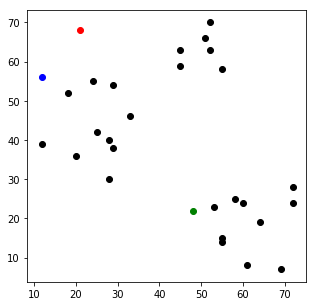

In [7]:
fig = plt.figure(figsize=(5,5))
plt.scatter(df.x,df.y,c='k')
colmap = {0:'r',1:'g',2:'b'} # try to make color them! yehh..
for i in centroids.keys():
    plt.scatter(*centroids[i],color=colmap[i])
plt.show() 
# colored points are random new data points while black points are original data points

### Assignment() : 
#### This function calculate euclidian distance between cluster_centroid _points with  all data_points and assign new label to the nearest point respective to cluster_centroid_point 

In [8]:
# Assignment stage
def assignment(df,centroids):
    
    for i in centroids.keys(): # calculating euclidian distance
        df[f'distance_from_{i}'] = np.sqrt(np.square(df.x - centroids[i][0]) + np.square(df.y - centroids[i][1]))

    centroids_distance_cols = [f'distance_from_{i}' for i in centroids.keys()]
    
    df['closest'] = df[centroids_distance_cols].idxmin(axis=1)
    df['closest'] = df['closest'].map(lambda x: int(x[-1]))
    df['color']   = df['closest'].map(lambda x: colmap[x])
    
    return df

In [9]:
df = assignment(df,centroids)
df.head()

,x,y,distance_from_0,distance_from_1,distance_from_2,closest,color
0,12,39,30.364453,39.812058,17.000000,2,b
1,55,15,62.968246,9.899495,59.413803,1,g
2,58,25,56.727418,10.440307,55.470713,1,g
3,60,24,58.796258,12.165525,57.688820,1,g
4,72,28,64.815122,24.738634,66.211781,1,g


Here, 
1. x,y are data points
2. distance_from_0 , distance_from_1 and distance_from_2 is a distance from 3 clusters to the x,y data point
3. Now, we find among three distances which cluster is close to the data point for instance 3rd cluster is closest to the first data point and we label first point as color 'b'

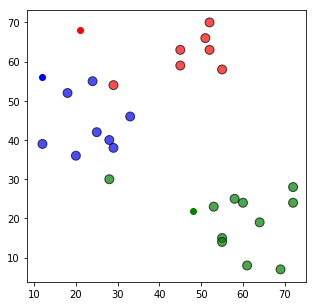

In [10]:
fig = plt.figure(figsize = (5,5))
plt.scatter(df.x,df.y,c=df.color,edgecolors='k',s=80,alpha=.7)
for i in centroids.keys():
    plt.scatter(*centroids[i],c=colmap[i])
plt.show()

Now, we calculate mean of each cluster and set the new centroid points to the mean values

In [11]:
# update stage
import copy
old_centroids = copy.deepcopy(centroids) # make a copy of old centeroid to campare with updated centeroid points

def update(centroids):
    
    for i in centroids.keys():
        centroids[i][0] = np.mean(df[df.closest == i].x)
        centroids[i][1] = np.mean(df[df.closest == i].y)
        
    return centroids

In [12]:
centroids = update(centroids)
print('Old_centroids: ',old_centroids)
print('New_centroids: ',centroids)

Old_centroids:  {0: [21, 68], 1: [48, 22], 2: [12, 56]}
New_centroids:  {0: [47.0, 61.857142857142854], 1: [58.81818181818182, 19.727272727272727], 2: [23.625, 43.5]}


Now, we plot both old and new center points to check is it working

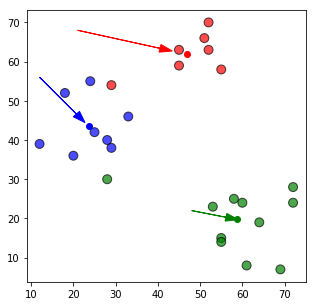

In [13]:
fig = plt.figure(figsize=(5,5))
ax = plt.axes()
plt.scatter(df.x,df.y,c=df.color,edgecolors='k',s=80,alpha=.7)
for i in centroids.keys():
    plt.scatter(*centroids[i],c=colmap[i])
    
for i in old_centroids.keys():
    oldx = old_centroids[i][0]
    oldy = old_centroids[i][1]
    dx = (centroids[i][0] - old_centroids[i][0]) * .75
    dy = (centroids[i][1] - old_centroids[i][1]) * .75
    ax.arrow(oldx,oldy,dx,dy,head_width=2,head_length=3
            ,fc=colmap[i],ec=colmap[i])
    
plt.show()

The tail part of arrow is old location of center point and the head part of arrow is new location of center points

and we done!!!!

now, we repeat assignment and update again and again until our center point doesn't stop changing. How we know if we get correct center point?? we are labelling each data point so after next iteration we compare previous label and new label if both are same which means we are done.

Since, KMean algorithm doesn't tell us that the labels are correct or not it's just seperate all data points into sub small parts or 'k' parts

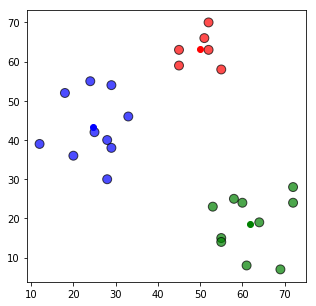

In [16]:
# continue until all assigned categories don't change any more
while True:
    closest_centroids = df.closest.copy(deep=True)
    centroids = update(centroids)
    df = assignment(df,centroids)
    if closest_centroids.equals(df.closest):
        break
    
fig = plt.figure(figsize = (5,5))
plt.scatter(df.x,df.y,c=df.color,edgecolors='k',s=80,alpha=.7)
for i in centroids.keys():
    plt.scatter(*centroids[i],c=colmap[i])
plt.show()

In [18]:
centroids

{0: [50.0, 63.166666666666664], 1: [61.9, 18.7], 2: [24.6, 43.2]}

### Now, I will show this answer using sklearn

In [19]:
from sklearn.cluster import KMeans

kmean = KMeans(n_clusters=3)
kmean.fit(df1)

labels = kmean.predict(df1)
centroids = kmean.cluster_centers_
centroids

array([[50.        , 63.16666667],
       [61.9       , 18.7       ],
       [24.6       , 43.2       ]])

# BAAM!!!!!!

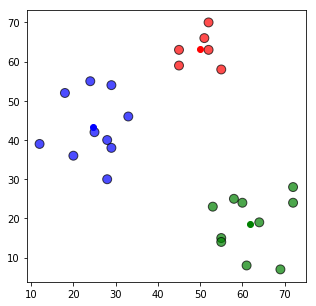

In [20]:
fig = plt.figure(figsize = (5,5))
colors = map(lambda x : colmap[x],labels)
color1 = list(colors)
plt.scatter(df.x,df.y,c=color1,edgecolors='k',s=80,alpha=.7)
for i,cent in enumerate(centroids):
    plt.scatter(*cent,c=colmap[i])
plt.show()

## very sensitive towards scalling so for best practice first normalize your data